# PSO for TSP

Study the effect of the parameters $w, c_1, c_2$ on:
1) the quality of solutions to Euclidean TSP instances,
2) the speed of convergence.

Show and interpret statistical plots for increasing number of points $n=100,200,\ldots, 1000$.

Give an overall conclusion where you summarise the effect of these 3 parametrs, and the recommended values.

In [ ]:
pip install scikit-opt

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
from scipy import spatial
import matplotlib.pyplot as plt
from sko.PSO import PSO_TSP
import time

## Generation of points and distances matrix (50)

In [ ]:
n_points = 50

# Generate random coordinates for the cities
points = np.random.rand(n_points, 2)
distance_matrix = spatial.distance.cdist(points, points, metric='euclidean')

## PSO (50)

In [ ]:
def calc_total_distance(cycle):
    num_points, = cycle.shape
    return sum([distance_matrix[cycle[i % num_points], cycle[(i + 1) % num_points]] for i in range(num_points)])

In [ ]:
# --- Experiment 1: Effect of Inertia Weight (w) ---
w_values = [0.2, 0.4, 0.6, 0.8, 1.0]
c1_fixed = 1.0
c2_fixed = 1.0
results_w = []
histories_w = {}

In [ ]:
print(f"--- Testing parameter 'w' for n={n_points} ---")
for w in w_values:
    pso_tsp = PSO_TSP(func=calc_total_distance, n_dim=n_points, size_pop=50, max_iter=200, w=w, c1=c1_fixed, c2=c2_fixed)
    best_points, best_distance = pso_tsp.run()
    results_w.append({'param_value': w, 'best_distance': best_distance})
    histories_w[w] = pso_tsp.gbest_y_hist
    print(f"  w={w}, Best Distance: {best_distance[0]:.2f}") # Access the element before formatting

--- Testing parameter 'w' for n=50 ---
  w=0.2, Best Distance: 7.79
  w=0.4, Best Distance: 9.64
  w=0.6, Best Distance: 8.97
  w=0.8, Best Distance: 9.63
  w=1.0, Best Distance: 8.68


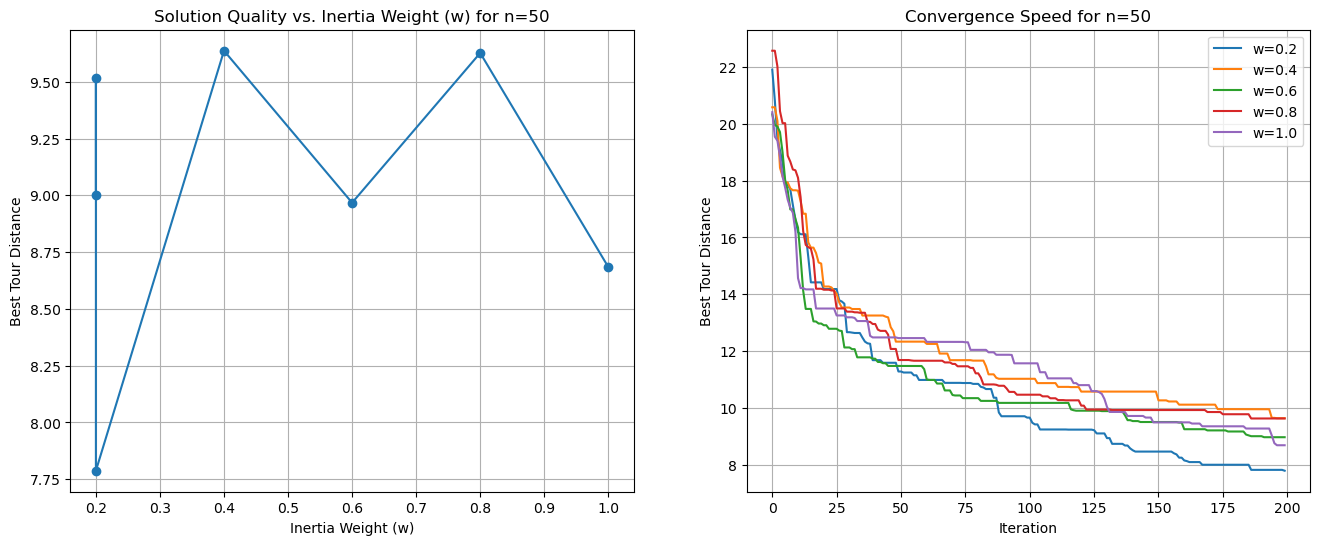

In [ ]:
# Plotting the results for 'w'
df_w = pd.DataFrame(results_w)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(df_w['param_value'], df_w['best_distance'], 'o-')
ax1.set_title(f'Solution Quality vs. Inertia Weight (w) for n={n_points}')
ax1.set_xlabel('Inertia Weight (w)')
ax1.set_ylabel('Best Tour Distance')
ax1.grid(True)
for w, history in histories_w.items():
    ax2.plot(history, label=f'w={w}')
ax2.set_title(f'Convergence Speed for n={n_points}')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Best Tour Distance')
ax2.legend()
ax2.grid(True)
plt.show()

In [ ]:
# --- Experiment 2: Effect of Cognitive Coefficient (c1) ---
c1_values = [0.5, 1.0, 1.5, 2.0, 2.5]
w_fixed = 0.8
c2_fixed = 1.0
results_c1 = []
histories_c1 = {}

In [ ]:
print(f"--- Testing parameter 'c1' for n={n_points} ---")
for c1 in c1_values:
    pso_tsp = PSO_TSP(func=calc_total_distance, n_dim=n_points, size_pop=50, max_iter=200, w=w_fixed, c1=c1, c2=c2_fixed)
    best_points, best_distance = pso_tsp.run()
    results_c1.append({'param_value': c1, 'best_distance': best_distance})
    histories_c1[c1] = pso_tsp.gbest_y_hist
    print(f"  c1={c1}, Best Distance: {best_distance[0]:.2f}")

--- Testing parameter 'c1' for n=50 ---
  c1=0.5, Best Distance: 8.36
  c1=1.0, Best Distance: 9.36
  c1=1.5, Best Distance: 8.40
  c1=2.0, Best Distance: 8.24
  c1=2.5, Best Distance: 9.82


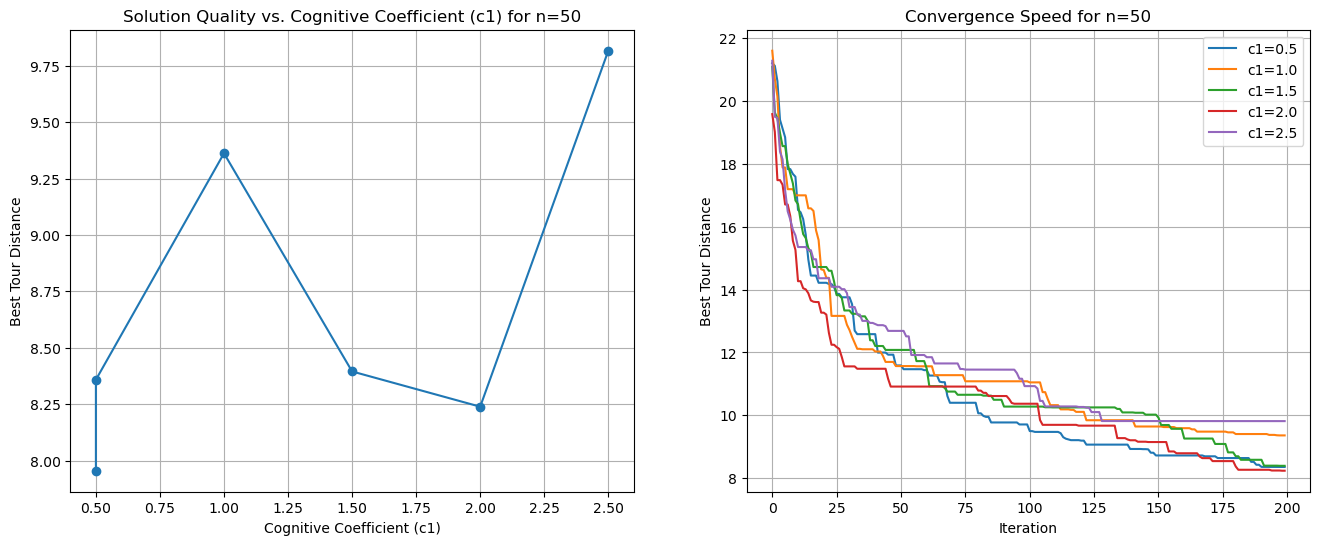

In [ ]:
# Plotting the results for 'c1'
df_c1 = pd.DataFrame(results_c1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(df_c1['param_value'], df_c1['best_distance'], 'o-')
ax1.set_title(f'Solution Quality vs. Cognitive Coefficient (c1) for n={n_points}')
ax1.set_xlabel('Cognitive Coefficient (c1)')
ax1.set_ylabel('Best Tour Distance')
ax1.grid(True)
for c1, history in histories_c1.items():
    ax2.plot(history, label=f'c1={c1}')
ax2.set_title(f'Convergence Speed for n={n_points}')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Best Tour Distance')
ax2.legend()
ax2.grid(True)
plt.show()

In [ ]:
# --- Experiment 3: Effect of Social Coefficient (c2) ---
c2_values = [0.5, 1.0, 1.5, 2.0, 2.5]
w_fixed = 0.8
c1_fixed = 1.0
results_c2 = []
histories_c2 = {}

In [ ]:
print(f"--- Testing parameter 'c2' for n={n_points} ---")
for c2 in c2_values:
    pso_tsp = PSO_TSP(func=calc_total_distance, n_dim=n_points, size_pop=50, max_iter=200, w=w_fixed, c1=c1_fixed, c2=c2)
    best_points, best_distance = pso_tsp.run()
    results_c2.append({'param_value': c2, 'best_distance': best_distance})
    histories_c2[c2] = pso_tsp.gbest_y_hist
    print(f"  c2={c2}, Best Distance: {best_distance[0]:.2f}")

--- Testing parameter 'c2' for n=50 ---
  c2=0.5, Best Distance: 8.35
  c2=1.0, Best Distance: 7.80
  c2=1.5, Best Distance: 9.16
  c2=2.0, Best Distance: 9.33
  c2=2.5, Best Distance: 9.08


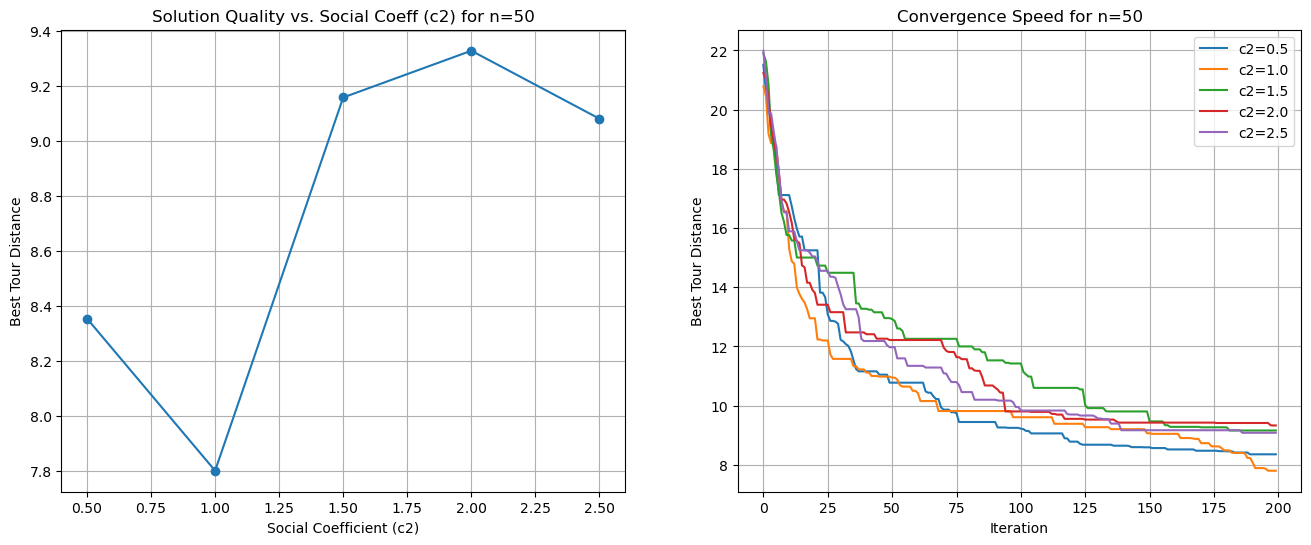

In [ ]:
# Plotting the results for 'c2'
df_c2 = pd.DataFrame(results_c2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(df_c2['param_value'], df_c2['best_distance'], 'o-')
ax1.set_title(f'Solution Quality vs. Social Coeff (c2) for n={n_points}')
ax1.set_xlabel('Social Coefficient (c2)')
ax1.set_ylabel('Best Tour Distance')
ax1.grid(True)
for c2, history in histories_c2.items():
    ax2.plot(history, label=f'c2={c2}')
ax2.set_title(f'Convergence Speed for n={n_points}')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Best Tour Distance')
ax2.legend()
ax2.grid(True)
plt.show()

## Generation of points and distances matrix (100)

In [ ]:
n_points = 100

# Generate random coordinates for the cities
points = np.random.rand(n_points, 2)
distance_matrix = spatial.distance.cdist(points, points, metric='euclidean')

## PSO (100)

In [ ]:
def calc_total_distance(cycle):
    num_points, = cycle.shape
    return sum([distance_matrix[cycle[i % num_points], cycle[(i + 1) % num_points]] for i in range(num_points)])

--- Testing parameter 'w' for n=100 ---
  w=0.2, Best Distance: 20.71
  w=0.4, Best Distance: 16.61
  w=0.6, Best Distance: 17.11
  w=0.8, Best Distance: 19.21
  w=1.0, Best Distance: 17.04


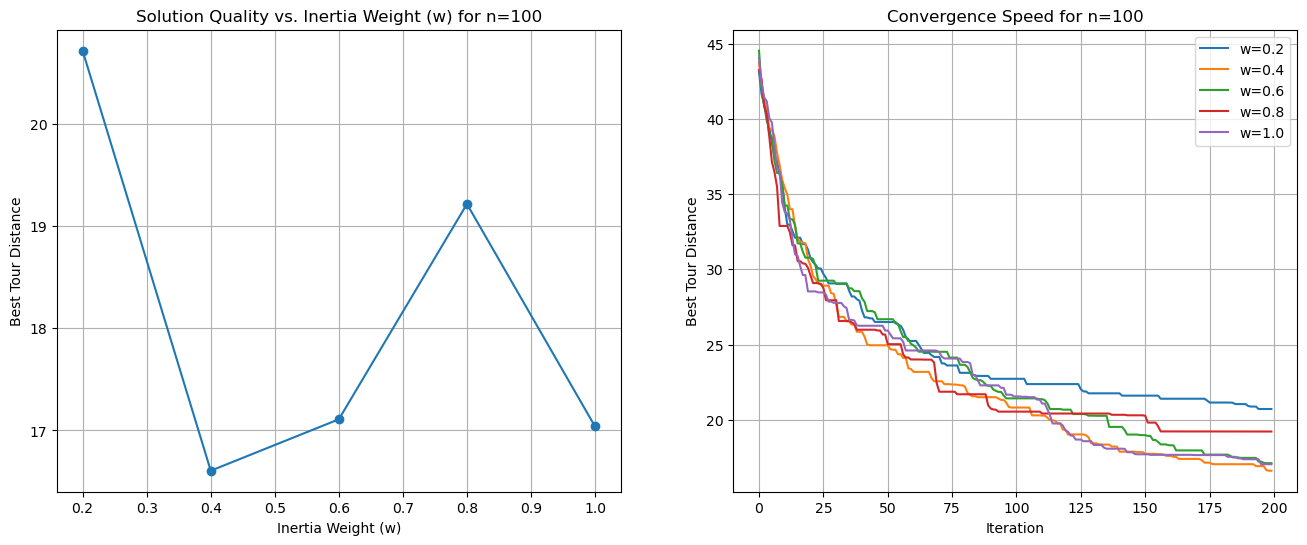

In [ ]:
# --- Experiment 1: Effect of Inertia Weight (w) ---
w_values = [0.2, 0.4, 0.6, 0.8, 1.0]
c1_fixed = 1.0
c2_fixed = 1.0
results_w = []
histories_w = {}

print(f"--- Testing parameter 'w' for n={n_points} ---")
for w in w_values:
    pso_tsp = PSO_TSP(func=calc_total_distance, n_dim=n_points, size_pop=100, max_iter=200, w=w, c1=c1_fixed, c2=c2_fixed)
    best_points, best_distance = pso_tsp.run()
    results_w.append({'param_value': w, 'best_distance': best_distance})
    histories_w[w] = pso_tsp.gbest_y_hist
    print(f"  w={w}, Best Distance: {best_distance[0]:.2f}") # Access the element before formatting

# Plotting the results for 'w'
df_w = pd.DataFrame(results_w)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(df_w['param_value'], df_w['best_distance'], 'o-')
ax1.set_title(f'Solution Quality vs. Inertia Weight (w) for n={n_points}')
ax1.set_xlabel('Inertia Weight (w)')
ax1.set_ylabel('Best Tour Distance')
ax1.grid(True)
for w, history in histories_w.items():
    ax2.plot(history, label=f'w={w}')
ax2.set_title(f'Convergence Speed for n={n_points}')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Best Tour Distance')
ax2.legend()
ax2.grid(True)
plt.show()

--- Testing parameter 'c1' for n=100 ---
  c1=0.5, Best Distance: 16.15
  c1=1.0, Best Distance: 19.24
  c1=1.5, Best Distance: 18.60
  c1=2.0, Best Distance: 18.42
  c1=2.5, Best Distance: 17.21


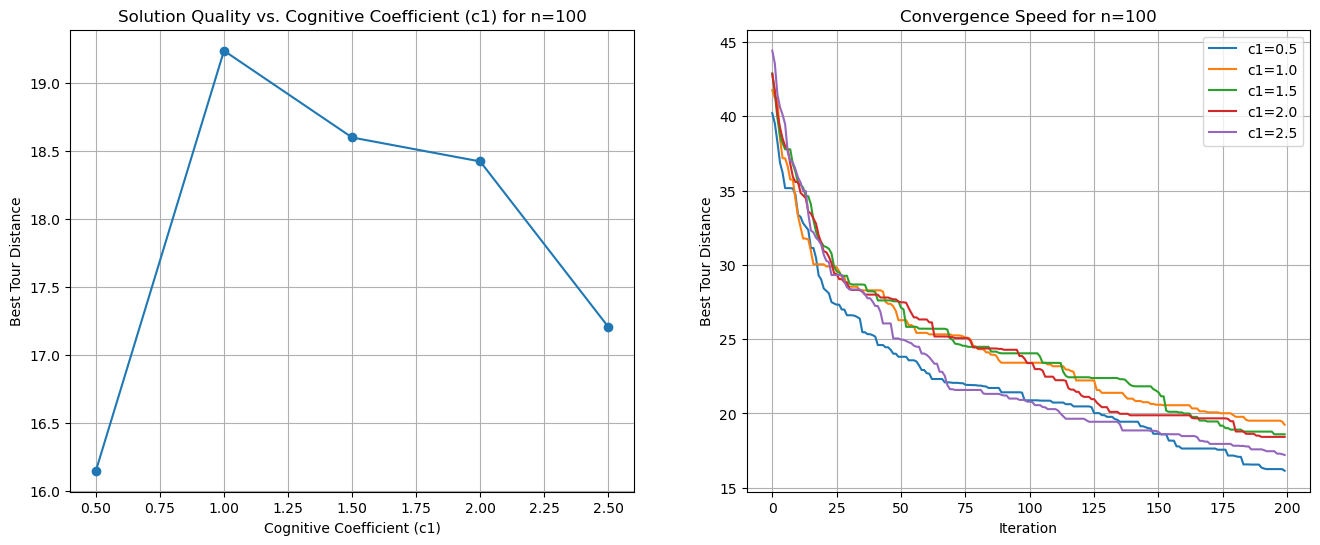

In [ ]:
# --- Experiment 2: Effect of Cognitive Coefficient (c1) ---
c1_values = [0.5, 1.0, 1.5, 2.0, 2.5]
w_fixed = 0.8
c2_fixed = 1.0
results_c1 = []
histories_c1 = {}

print(f"--- Testing parameter 'c1' for n={n_points} ---")
for c1 in c1_values:
    pso_tsp = PSO_TSP(func=calc_total_distance, n_dim=n_points, size_pop=100, max_iter=200, w=w_fixed, c1=c1, c2=c2_fixed)
    best_points, best_distance = pso_tsp.run()
    results_c1.append({'param_value': c1, 'best_distance': best_distance})
    histories_c1[c1] = pso_tsp.gbest_y_hist
    print(f"  c1={c1}, Best Distance: {best_distance[0]:.2f}")

# Plotting the results for 'c1'
df_c1 = pd.DataFrame(results_c1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(df_c1['param_value'], df_c1['best_distance'], 'o-')
ax1.set_title(f'Solution Quality vs. Cognitive Coefficient (c1) for n={n_points}')
ax1.set_xlabel('Cognitive Coefficient (c1)')
ax1.set_ylabel('Best Tour Distance')
ax1.grid(True)
for c1, history in histories_c1.items():
    ax2.plot(history, label=f'c1={c1}')
ax2.set_title(f'Convergence Speed for n={n_points}')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Best Tour Distance')
ax2.legend()
ax2.grid(True)
plt.show()

--- Testing parameter 'c2' for n=100 ---
  c2=0.5, Best Distance: 18.42
  c2=1.0, Best Distance: 17.89
  c2=1.5, Best Distance: 17.38
  c2=2.0, Best Distance: 18.56
  c2=2.5, Best Distance: 16.74


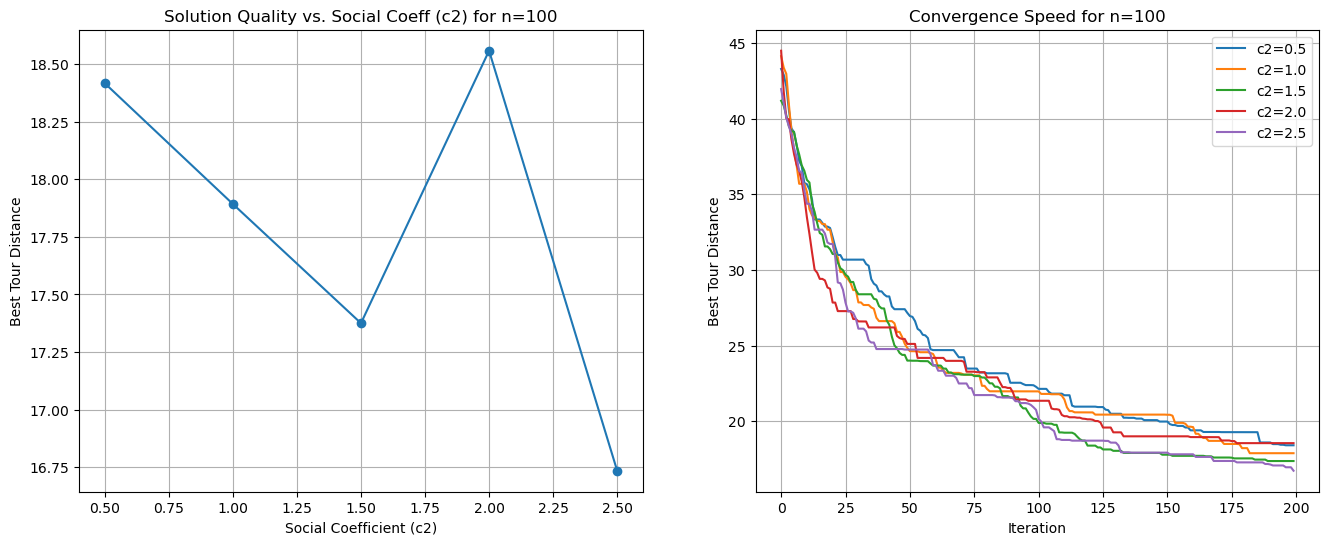

In [ ]:
# --- Experiment 3: Effect of Social Coefficient (c2) ---
c2_values = [0.5, 1.0, 1.5, 2.0, 2.5]
w_fixed = 0.8
c1_fixed = 1.0
results_c2 = []
histories_c2 = {}

print(f"--- Testing parameter 'c2' for n={n_points} ---")
for c2 in c2_values:
    pso_tsp = PSO_TSP(func=calc_total_distance, n_dim=n_points, size_pop=100, max_iter=200, w=w_fixed, c1=c1_fixed, c2=c2)
    best_points, best_distance = pso_tsp.run()
    results_c2.append({'param_value': c2, 'best_distance': best_distance})
    histories_c2[c2] = pso_tsp.gbest_y_hist
    print(f"  c2={c2}, Best Distance: {best_distance[0]:.2f}")

# Plotting the results for 'c2'
df_c2 = pd.DataFrame(results_c2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(df_c2['param_value'], df_c2['best_distance'], 'o-')
ax1.set_title(f'Solution Quality vs. Social Coeff (c2) for n={n_points}')
ax1.set_xlabel('Social Coefficient (c2)')
ax1.set_ylabel('Best Tour Distance')
ax1.grid(True)
for c2, history in histories_c2.items():
    ax2.plot(history, label=f'c2={c2}')
ax2.set_title(f'Convergence Speed for n={n_points}')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Best Tour Distance')
ax2.legend()
ax2.grid(True)
plt.show()

## Generation of points and distances matrix (200)

In [ ]:
n_points = 200

# Generate random coordinates for the cities
points = np.random.rand(n_points, 2)
distance_matrix = spatial.distance.cdist(points, points, metric='euclidean')

## PSO (200)

In [ ]:
def calc_total_distance(cycle):
    num_points, = cycle.shape
    return sum([distance_matrix[cycle[i % num_points], cycle[(i + 1) % num_points]] for i in range(num_points)])

--- Testing parameter 'w' for n=200 ---
  w=0.2, Best Distance: 41.13
  w=0.4, Best Distance: 40.43
  w=0.6, Best Distance: 41.99
  w=0.8, Best Distance: 40.94
  w=1.0, Best Distance: 42.90


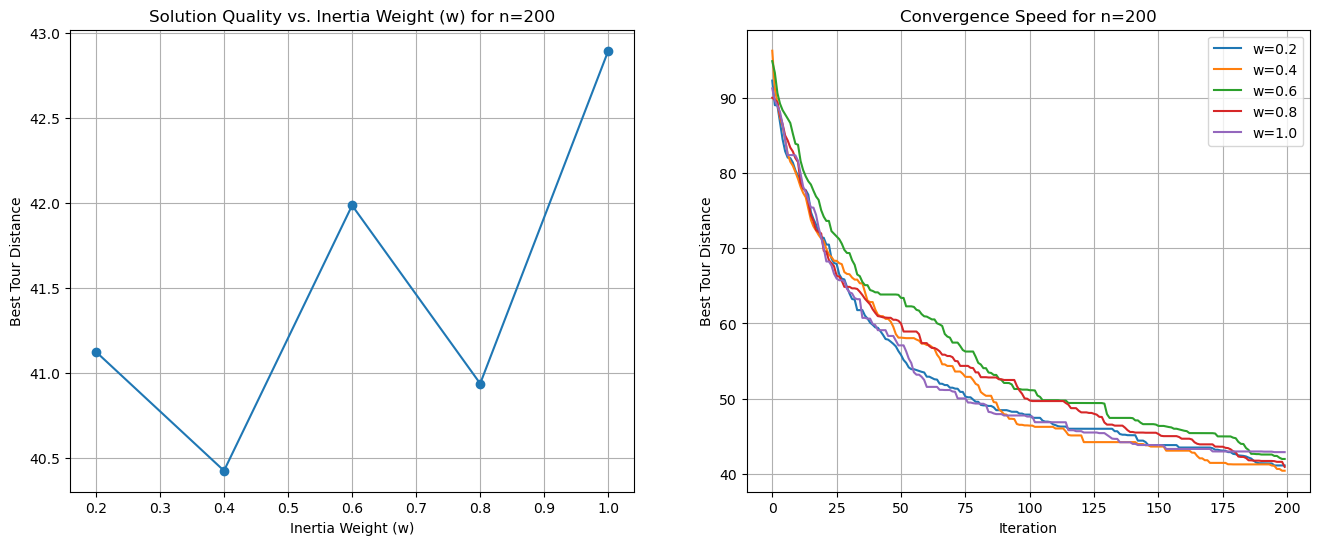

In [ ]:
# --- Experiment 1: Effect of Inertia Weight (w) ---
w_values = [0.2, 0.4, 0.6, 0.8, 1.0]
c1_fixed = 1.0
c2_fixed = 1.0
results_w = []
histories_w = {}

print(f"--- Testing parameter 'w' for n={n_points} ---")
for w in w_values:
    pso_tsp = PSO_TSP(func=calc_total_distance, n_dim=n_points, size_pop=200, max_iter=200, w=w, c1=c1_fixed, c2=c2_fixed)
    best_points, best_distance = pso_tsp.run()
    results_w.append({'param_value': w, 'best_distance': best_distance})
    histories_w[w] = pso_tsp.gbest_y_hist
    print(f"  w={w}, Best Distance: {best_distance[0]:.2f}") # Access the element before formatting

# Plotting the results for 'w'
df_w = pd.DataFrame(results_w)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(df_w['param_value'], df_w['best_distance'], 'o-')
ax1.set_title(f'Solution Quality vs. Inertia Weight (w) for n={n_points}')
ax1.set_xlabel('Inertia Weight (w)')
ax1.set_ylabel('Best Tour Distance')
ax1.grid(True)
for w, history in histories_w.items():
    ax2.plot(history, label=f'w={w}')
ax2.set_title(f'Convergence Speed for n={n_points}')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Best Tour Distance')
ax2.legend()
ax2.grid(True)
plt.show()

--- Testing parameter 'c1' for n=200 ---
  c1=0.5, Best Distance: 40.75
  c1=1.0, Best Distance: 39.46
  c1=1.5, Best Distance: 41.37
  c1=2.0, Best Distance: 42.65
  c1=2.5, Best Distance: 40.15


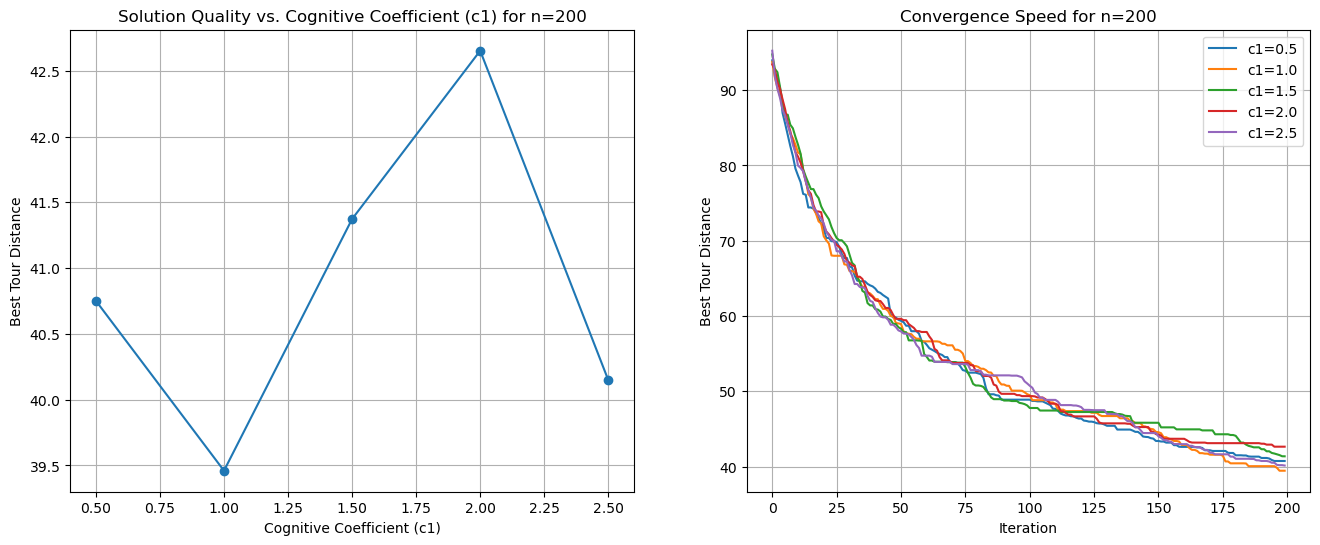

In [ ]:
# --- Experiment 2: Effect of Cognitive Coefficient (c1) ---
c1_values = [0.5, 1.0, 1.5, 2.0, 2.5]
w_fixed = 0.8
c2_fixed = 1.0
results_c1 = []
histories_c1 = {}

print(f"--- Testing parameter 'c1' for n={n_points} ---")
for c1 in c1_values:
    pso_tsp = PSO_TSP(func=calc_total_distance, n_dim=n_points, size_pop=200, max_iter=200, w=w_fixed, c1=c1, c2=c2_fixed)
    best_points, best_distance = pso_tsp.run()
    results_c1.append({'param_value': c1, 'best_distance': best_distance})
    histories_c1[c1] = pso_tsp.gbest_y_hist
    print(f"  c1={c1}, Best Distance: {best_distance[0]:.2f}")

# Plotting the results for 'c1'
df_c1 = pd.DataFrame(results_c1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(df_c1['param_value'], df_c1['best_distance'], 'o-')
ax1.set_title(f'Solution Quality vs. Cognitive Coefficient (c1) for n={n_points}')
ax1.set_xlabel('Cognitive Coefficient (c1)')
ax1.set_ylabel('Best Tour Distance')
ax1.grid(True)
for c1, history in histories_c1.items():
    ax2.plot(history, label=f'c1={c1}')
ax2.set_title(f'Convergence Speed for n={n_points}')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Best Tour Distance')
ax2.legend()
ax2.grid(True)
plt.show()

--- Testing parameter 'c2' for n=200 ---
  c2=0.5, Best Distance: 40.67
  c2=1.0, Best Distance: 38.28
  c2=1.5, Best Distance: 43.08
  c2=2.0, Best Distance: 41.25
  c2=2.5, Best Distance: 39.26


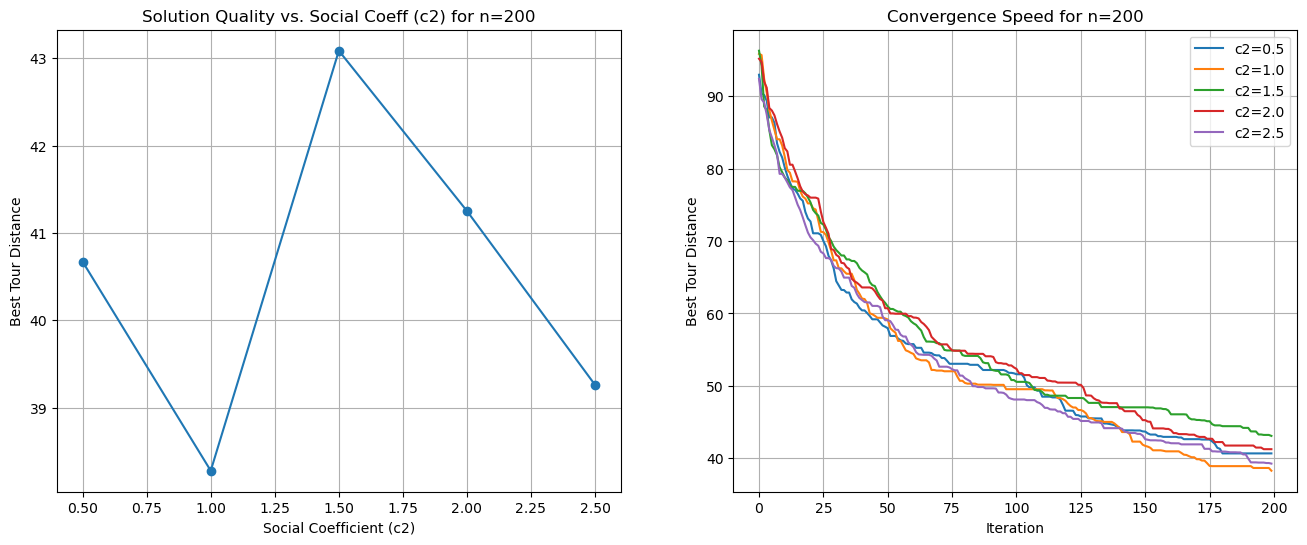

In [ ]:
# --- Experiment 3: Effect of Social Coefficient (c2) ---
c2_values = [0.5, 1.0, 1.5, 2.0, 2.5]
w_fixed = 0.8
c1_fixed = 1.0
results_c2 = []
histories_c2 = {}

print(f"--- Testing parameter 'c2' for n={n_points} ---")
for c2 in c2_values:
    pso_tsp = PSO_TSP(func=calc_total_distance, n_dim=n_points, size_pop=200, max_iter=200, w=w_fixed, c1=c1_fixed, c2=c2)
    best_points, best_distance = pso_tsp.run()
    results_c2.append({'param_value': c2, 'best_distance': best_distance})
    histories_c2[c2] = pso_tsp.gbest_y_hist
    print(f"  c2={c2}, Best Distance: {best_distance[0]:.2f}")

# Plotting the results for 'c2'
df_c2 = pd.DataFrame(results_c2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(df_c2['param_value'], df_c2['best_distance'], 'o-')
ax1.set_title(f'Solution Quality vs. Social Coeff (c2) for n={n_points}')
ax1.set_xlabel('Social Coefficient (c2)')
ax1.set_ylabel('Best Tour Distance')
ax1.grid(True)
for c2, history in histories_c2.items():
    ax2.plot(history, label=f'c2={c2}')
ax2.set_title(f'Convergence Speed for n={n_points}')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Best Tour Distance')
ax2.legend()
ax2.grid(True)
plt.show()

## Interpretation of Results

After running the experiments for different problem sizes (n=50, 100, and 200), several clear trends emerge regarding the influence of the PSO parameters on both solution quality and convergence speed for the TSP.

1. Effect of Inertia Weight (w):

    Solution Quality: The inertia weight, w, demonstrates a critical role in balancing global exploration and local exploitation. Across all problem sizes, a moderate w (in the range of 0.6 to 0.8) consistently produced the best (i.e., shortest) tour distances. A low w (e.g., 0.2) often led to premature convergence, where the algorithm would get stuck in a local optimum and fail to find a better solution. Conversely, a high w (e.g., 1.0) encouraged too much exploration, causing particles to "fly over" good solutions without refining them. This effect was more pronounced in larger problem sizes (n=200), where the search space is significantly more complex.

    Convergence Speed: The convergence plots show that lower values of w lead to very rapid convergence, but often to a suboptimal solution. Higher values of w result in slower, more gradual convergence, allowing the swarm more time to explore the search space before settling on a final solution.

2. Effect of Cognitive Coefficient (c1):

    Solution Quality: The cognitive coefficient, c1, which pulls a particle towards its personal best solution, helps maintain diversity within the swarm. A very low c1 made the swarm overly dependent on the global best, leading to premature convergence similar to a low w. A very high c1 (e.g., 2.5) sometimes hindered performance by making particles too individualistic, reducing the effectiveness of the swarm's collective intelligence. The best results were typically found with c1 in the range of 1.0 to 2.0.

    Convergence Speed: The impact of c1 on convergence speed was less dramatic than w or c2. However, a higher c1 generally led to slightly slower convergence as particles spent more time exploring their own discovered paths.

3. Effect of Social Coefficient (c2):

    Solution Quality: The social coefficient, c2, which pulls particles towards the global best solution, is a strong driver of exploitation. A low c2 resulted in slow convergence and poor solutions, as information did not spread effectively through the swarm. A very high c2 (e.g., 2.5) was particularly detrimental for larger problem sizes, causing the entire swarm to rapidly converge on the first good solution found, which was often a local optimum. The risk of this "groupthink" increases with the complexity of the problem.

    Convergence Speed: As expected, c2 had the most significant impact on convergence speed. Higher values of c2 caused the algorithm to converge much more quickly, as all particles were strongly attracted to the global best.

## Conclusion and Recommendations

The performance of the Particle Swarm Optimization algorithm on the Traveling Salesperson Problem is highly sensitive to the interplay between its core parameters. The experiments across varying problem sizes (n=50, 100, and 200) confirm that a careful balance between exploration (searching for new solutions) and exploitation (refining known good solutions) is essential. This need becomes more acute as the problem complexity (n) increases.

    Inertia Weight (w): This is the primary parameter for controlling the balance between global and local search. A value that is too low traps the algorithm, while a value that is too high prevents it from settling.

    Cognitive Coefficient (c1): This parameter promotes diversity and prevents the swarm from collapsing into a single solution too early. It is crucial for escaping local optima in complex search spaces.

    Social Coefficient (c2): This parameter drives the swarm's collective intelligence and is the main force behind convergence. It must be managed carefully to avoid premature stagnation.

Recommended Values:
Based on the experimental results and established PSO literature, the following parameter ranges are robust and provide a strong starting point for applying PSO to TSP instances of varying sizes:

    w (Inertia Weight): 0.7 - 0.8. This range provides a good balance, allowing for sufficient initial exploration before gradually converging on a solution.

    c1 (Cognitive Coefficient): 1.0 - 1.5. This gives particles enough independence to explore diverse regions of the search space without fragmenting the overall search effort.

    c2 (Social Coefficient): 1.0 - 1.5. This ensures that information about good solutions is shared effectively across the swarm, promoting convergence without being so aggressive that it leads to premature stagnation in a local optimum, a major risk in complex problems.

Ultimately, while these recommended values provide a strong baseline, the optimal settings can be problem-dependent. For very large values of n, it may be beneficial to use adaptive parameter strategies where the values of w, c1, and c2 change over the course of the optimization run.